**Brian Blaylock**  
**March 27, 2019**

# Explore Contingency Table
## Hovemoller Diagram

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import os
from matplotlib.path import Path

import matplotlib as mpl
#mpl.rcParams['figure.figsize'] = [15,15]
mpl.rcParams['figure.titlesize'] = 15
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 15
mpl.rcParams['lines.linewidth'] = 1.8
mpl.rcParams['grid.linewidth'] = .25
mpl.rcParams['figure.subplot.wspace'] = 0.15
mpl.rcParams['figure.subplot.hspace'] = 0.15
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['legend.framealpha'] = .75
mpl.rcParams['legend.loc'] = 'best'
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.dpi'] = 100

SAVEDIR = '/uufs/chpc.utah.edu/common/home/u0553130/public_html/PhD/HRRR_GOES/GLM_hit_rate/'
if not os.path.exists(SAVEDIR):
    os.makedirs(SAVEDIR)

import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3')
from BB_maps.my_basemap import draw_HRRR_map, draw_centermap
from BB_HRRR.HRRR_Pando import get_hrrr_latlon, get_hrrr_variable
from BB_HRRR.GLM_and_HRRR.GLM_events_HRRR import get_GLM_HRRR_contingency_stats,\
                                                 hit_rate, \
                                                 false_alarm_ratio, \
                                                 gilbert_skill_score, \
                                                 proportion_correct, \
                                                 critical_success_index
from BB_HRRR.HRRR_paths import get_domains
from BB_GOES.get_GLM import get_GLM_file_nearesttime, accumulate_GLM_FAST

In [3]:
domains = get_domains()

In [4]:
DOMAIN = 'HRRR'
month = 6
hour = 0
DIR = '/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_HRRR/GLM_and_HRRR/HRRR_GLM_contingency_table'
FILE = '/%s/%s_2018_m%02d_h%02d.csv' % (DOMAIN, DOMAIN, month, hour)

data = np.genfromtxt(DIR+FILE, delimiter=',', names=True, dtype=None, encoding='UTF-8')

In [5]:
print(data.dtype.names)

('DATE', 'GLM_Event_COUNT', 'NUM_FILES', 'EXPECTED_FILES', 'F01_A', 'F02_A', 'F03_A', 'F04_A', 'F05_A', 'F06_A', 'F07_A', 'F08_A', 'F09_A', 'F10_A', 'F11_A', 'F12_A', 'F13_A', 'F14_A', 'F15_A', 'F16_A', 'F17_A', 'F18_A', 'F01_B', 'F02_B', 'F03_B', 'F04_B', 'F05_B', 'F06_B', 'F07_B', 'F08_B', 'F09_B', 'F10_B', 'F11_B', 'F12_B', 'F13_B', 'F14_B', 'F15_B', 'F16_B', 'F17_B', 'F18_B', 'F01_C', 'F02_C', 'F03_C', 'F04_C', 'F05_C', 'F06_C', 'F07_C', 'F08_C', 'F09_C', 'F10_C', 'F11_C', 'F12_C', 'F13_C', 'F14_C', 'F15_C', 'F16_C', 'F17_C', 'F18_C', 'F01_D', 'F02_D', 'F03_D', 'F04_D', 'F05_D', 'F06_D', 'F07_D', 'F08_D', 'F09_D', 'F10_D', 'F11_D', 'F12_D', 'F13_D', 'F14_D', 'F15_D', 'F16_D', 'F17_D', 'F18_D')


In [66]:
def get_HRRR_GLM_stats_hov_by_month(DOMAIN, month):
    for hour in range(24):
        DIR = '/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_HRRR/GLM_and_HRRR/HRRR_GLM_contingency_table'
        FILE = '/%s/%s_2018_m%02d_h%02d.csv' % (DOMAIN, DOMAIN, month, hour)

        data = np.genfromtxt(DIR+FILE, delimiter=',', names=True, dtype=None, encoding='UTF-8')

        mean_HR = []
        mean_FAR = []
        mean_GSS = []
        mean_CSS = []
        mean_A = []
        mean_B = []
        mean_C = []
        mean_D = []
        for f in range(1,19):
            A = data['F%02d_A' % f]
            B = data['F%02d_B' % f]
            C = data['F%02d_C' % f]
            D = data['F%02d_D' % f]
            #events = data['GLM_Event_Count']
            
            mean_HR.append(np.nanmean(hit_rate(A, B, C, D)))
            mean_FAR.append(np.nanmean(false_alarm_ratio(A, B, C, D)))
            mean_GSS.append(np.nanmean(gilbert_skill_score(A, B, C, D)))
            mean_CSS.append(np.nanmean(critical_success_index(A, B, C, D)))
            mean_A.append(np.nanmean(A))
            mean_B.append(np.nanmean(B))
            mean_C.append(np.nanmean(C))
            mean_D.append(np.nanmean(D))

        if hour == 0:
            mean_HR_HOV = np.array(mean_HR)
            mean_FAR_HOV = np.array(mean_FAR)
            mean_GSS_HOV = np.array(mean_GSS)
            mean_CSS_HOV = np.array(mean_CSS)
            mean_A_HOV = np.array(mean_A)
            mean_B_HOV = np.array(mean_B)
            mean_C_HOV = np.array(mean_C)
            mean_D_HOV = np.array(mean_D)
        else:
            mean_HR_HOV = np.vstack([mean_HR_HOV, mean_HR])
            mean_FAR_HOV = np.vstack([mean_FAR_HOV, mean_FAR])    
            mean_GSS_HOV = np.vstack([mean_GSS_HOV, mean_GSS])    
            mean_CSS_HOV = np.vstack([mean_CSS_HOV, mean_CSS])    
            mean_A_HOV = np.vstack([mean_A_HOV, mean_A])
            mean_B_HOV = np.vstack([mean_B_HOV, mean_B])
            mean_C_HOV = np.vstack([mean_C_HOV, mean_C])
            mean_D_HOV = np.vstack([mean_D_HOV, mean_D])

    return {'Hit Rate': np.transpose(mean_HR_HOV),
            'False Alarm Ratio': np.transpose(mean_FAR_HOV),
            'Gilbert Skill Score': np.transpose(mean_GSS_HOV),
            'Critical Success Index': np.transpose(mean_CSS_HOV),
            'Hits': np.transpose(mean_A_HOV),
            'False Alarms': np.transpose(mean_B_HOV),
            'Misses': np.transpose(mean_C_HOV),
            'Correct Rejections': np.transpose(mean_D_HOV),
           }

/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_wx_calcs/binary_events.py:120: RuntimeWarning: invalid value encountered in true_divide
  FAR = b/(a+b)
/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_wx_calcs/binary_events.py:111: RuntimeWarning: invalid value encountered in true_divide
  H = a/(a+c)
/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_wx_calcs/binary_events.py:162: RuntimeWarning: invalid value encountered in true_divide
  GSS = (a-a_r)/(a+b+c-a_r)
/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_wx_calcs/binary_events.py:135: RuntimeWarning: invalid value encountered in true_divide
  CSI = a/(a+b+c)


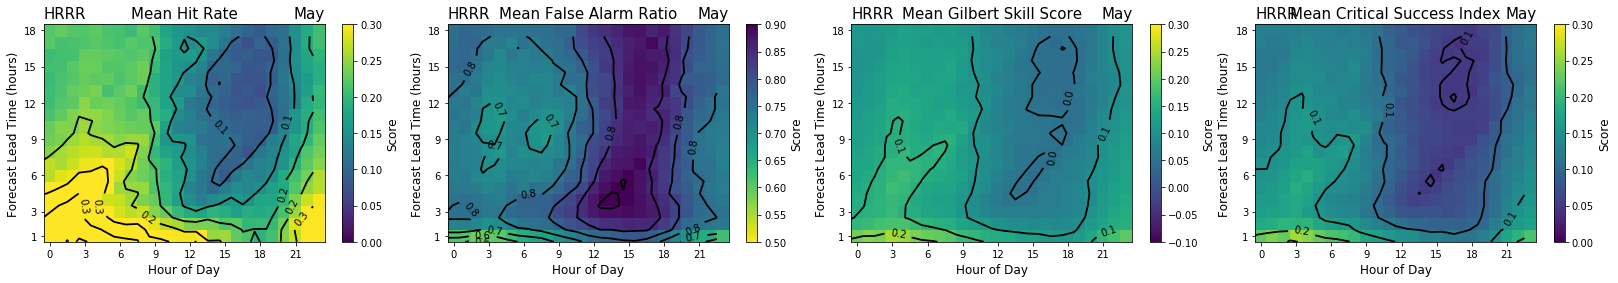

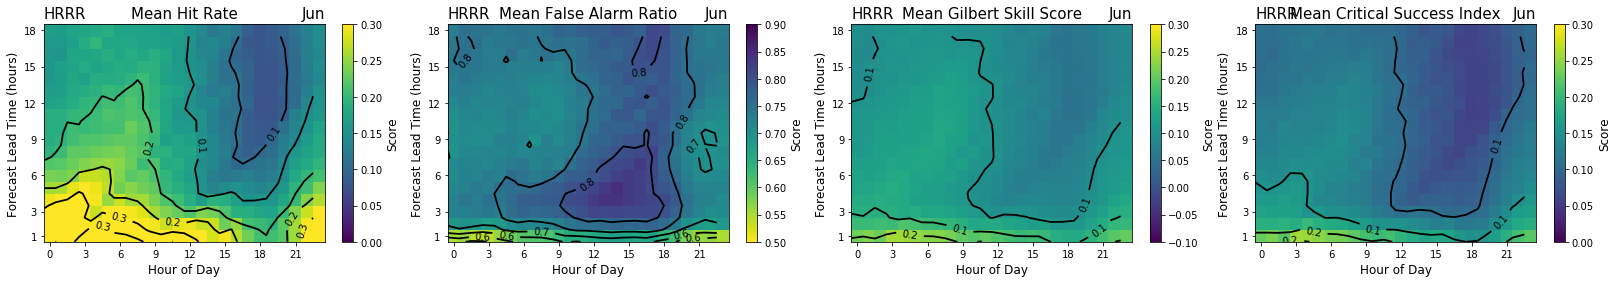

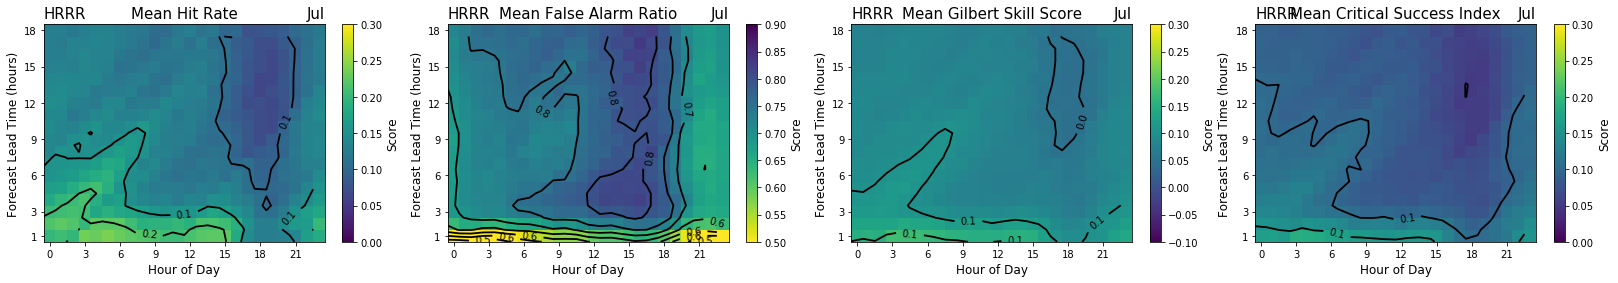

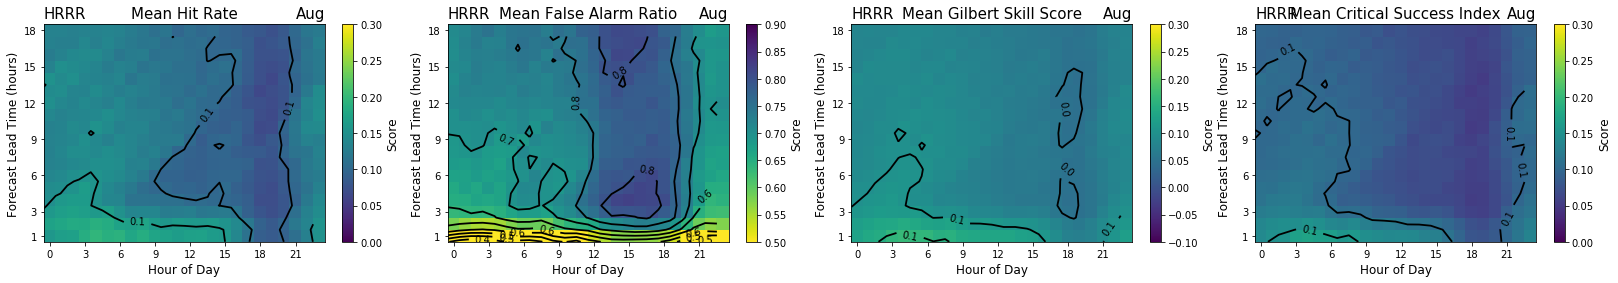

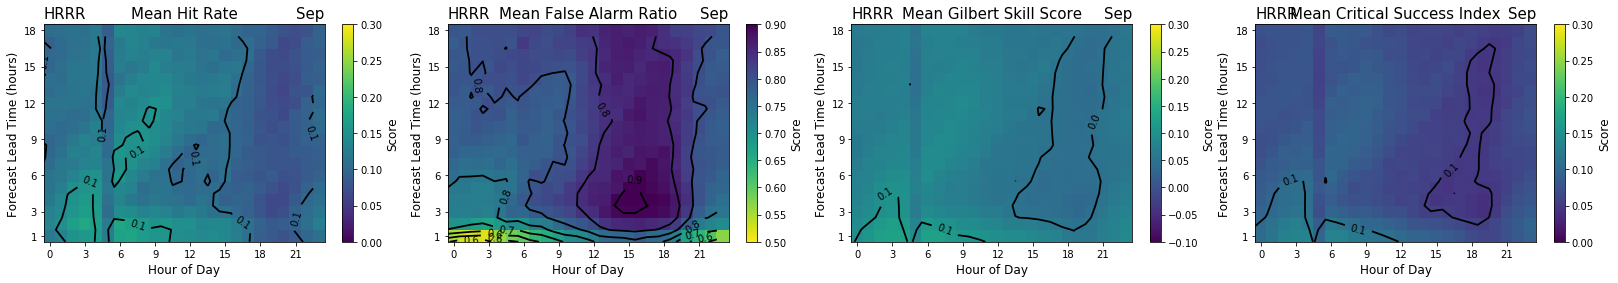

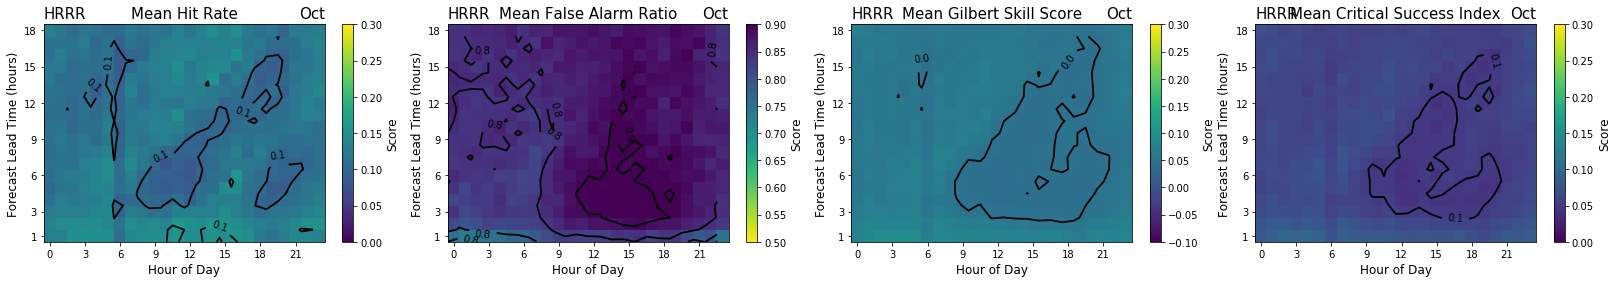

In [67]:
#for DOMAIN in domains:
for DOMAIN in ['HRRR']:
    for month in range(5,11):
        stats = get_HRRR_GLM_stats_hov_by_month(DOMAIN, month)
        #statsHRRR = get_HRRR_GLM_stats_hov_by_month('HRRR', month)

        fig, axes = plt.subplots(1, 4, figsize=(7*4, 4*1))

        for ax, name in zip(axes, ['Hit Rate', 'False Alarm Ratio', 'Gilbert Skill Score', 'Critical Success Index']):
            if name == 'False Alarm Ratio':
                cmap = 'viridis_r'
                vmax = .9
                vmin = .5
            elif name == 'Hit Rate':
                cmap = 'viridis'
                vmax = .30
                vmin = 0
            elif name == 'Gilbert Skill Score':
                cmap = 'viridis'
                vmax = .30
                vmin = -0.1
            elif name == 'Critical Success Index':
                cmap = 'viridis'
                vmax = .3
                vmin = 0
                

            plt.sca(ax)
            #plt.pcolormesh(range(25), range(1,20), stats[name]*100-statsHRRR[name]*100, cmap=cmap)
            plt.pcolormesh(range(25), range(1,20), stats[name], cmap=cmap, vmax=vmax, vmin=vmin)
            plt.colorbar(label='Score')
            CS = plt.contour(range(24), range(1,19), stats[name], colors='k', levels=np.arange(vmin-.1,vmax+1,.05))
            plt.clabel(CS, fmt='%1.1f')

            plt.yticks(np.array([1, 3, 6, 9, 12, 15, 18])+.5, [1, 3, 6, 9, 12, 15, 18])
            plt.xticks(np.arange(0,24,3)+.5, range(0,24,3), )

            plt.ylabel('Forecast Lead Time (hours)')
            plt.xlabel('Hour of Day')
            plt.title('Mean %s' % name)
            plt.title(DOMAIN, loc='left')
            plt.title(datetime(2018, month, 1).strftime('%b'), loc='right')

---
# Hovemollers Departure from HRRR
Compare a domains again the HRRR-wide statistics

/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_wx_calcs/binary_events.py:111: RuntimeWarning: invalid value encountered in true_divide
  H = a/(a+c)
/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_wx_calcs/binary_events.py:120: RuntimeWarning: invalid value encountered in true_divide
  FAR = b/(a+b)
/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_wx_calcs/binary_events.py:162: RuntimeWarning: invalid value encountered in true_divide
  GSS = (a-a_r)/(a+b+c-a_r)
/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_wx_calcs/binary_events.py:135: RuntimeWarning: invalid value encountered in true_divide
  CSI = a/(a+b+c)


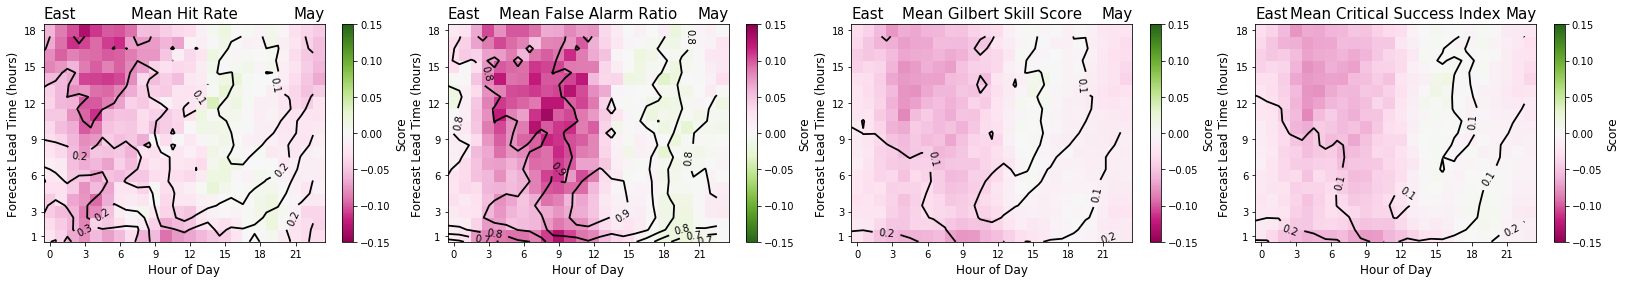

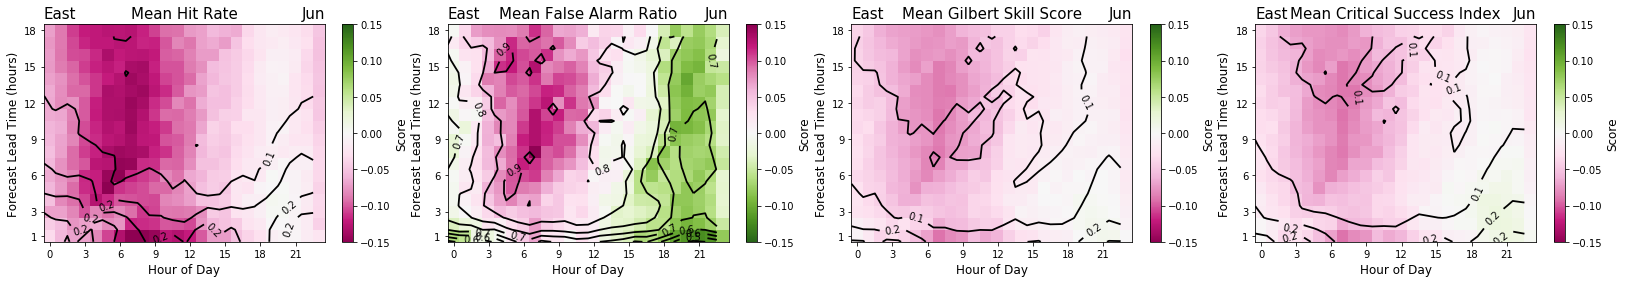

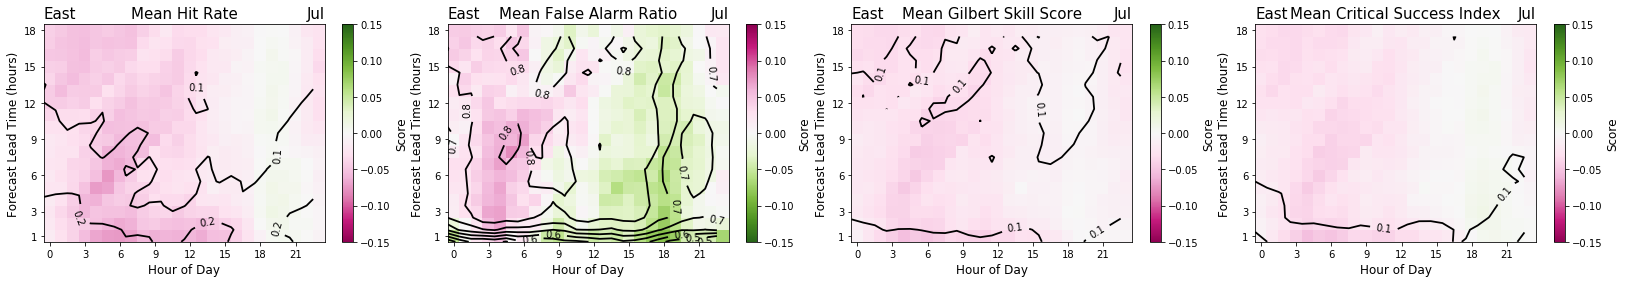

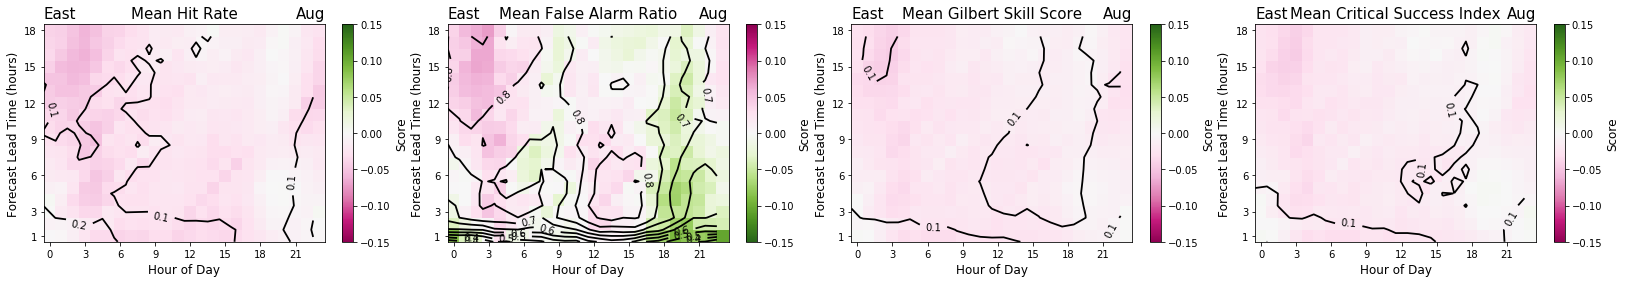

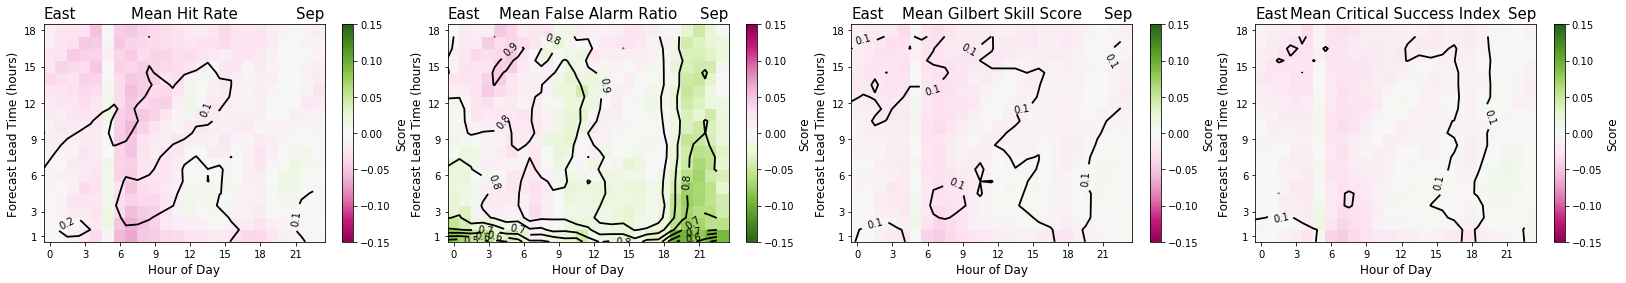

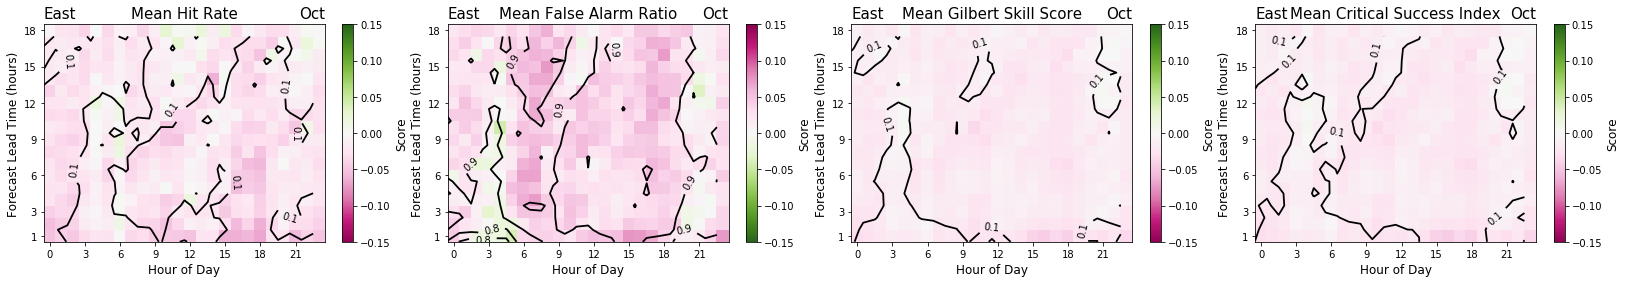

In [53]:
#for DOMAIN in domains:
for DOMAIN in ['East']:
    for month in range(5,11):
        stats = get_HRRR_GLM_stats_hov_by_month(DOMAIN, month)
        statsHRRR = get_HRRR_GLM_stats_hov_by_month('HRRR', month)

        fig, axes = plt.subplots(1, 4, figsize=(7*4, 4*1))

        for ax, name in zip(axes, ['Hit Rate', 'False Alarm Ratio', 'Gilbert Skill Score', 'Critical Success Index']):
            if name == 'False Alarm Ratio':
                cmap = 'PiYG_r'
            else:
                cmap = 'PiYG'
            vmax = 0.15
            vmin = -0.15

            plt.sca(ax)
            plt.pcolormesh(range(25), range(1,20), stats[name]-statsHRRR[name], cmap=cmap, vmax=vmax, vmin=vmin)
            plt.colorbar(label='Score', ticks=np.arange(vmin,vmax+.01,.05))
            CS = plt.contour(range(24), range(1,19), stats[name], colors='k', levels=np.arange(0,1,.05))
            plt.clabel(CS, fmt='%1.1f')

            plt.yticks(np.array([1, 3, 6, 9, 12, 15, 18])+.5, [1, 3, 6, 9, 12, 15, 18])
            plt.xticks(np.arange(0,24,3)+.5, range(0,24,3), )

            plt.ylabel('Forecast Lead Time (hours)')
            plt.xlabel('Hour of Day')
            plt.title('Mean %s' % name)
            plt.title(DOMAIN, loc='left')
            plt.title(datetime(2018, month, 1).strftime('%b'), loc='right')

# When do the misses+falseAlarms exceed the Hits

/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_wx_calcs/binary_events.py:120: RuntimeWarning: invalid value encountered in true_divide
  FAR = b/(a+b)
/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_wx_calcs/binary_events.py:111: RuntimeWarning: invalid value encountered in true_divide
  H = a/(a+c)
/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_wx_calcs/binary_events.py:162: RuntimeWarning: invalid value encountered in true_divide
  GSS = (a-a_r)/(a+b+c-a_r)
/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_wx_calcs/binary_events.py:135: RuntimeWarning: invalid value encountered in true_divide
  CSI = a/(a+b+c)


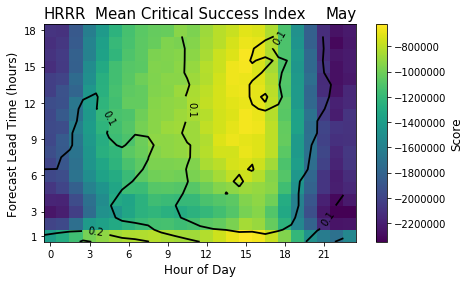

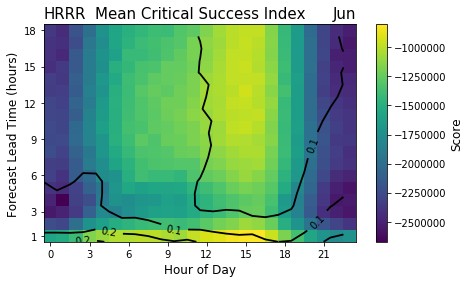

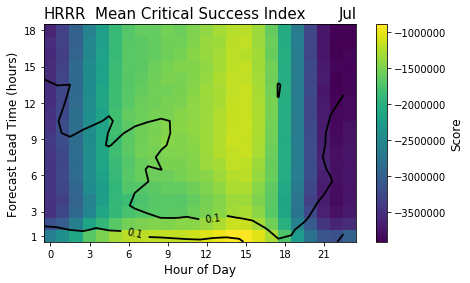

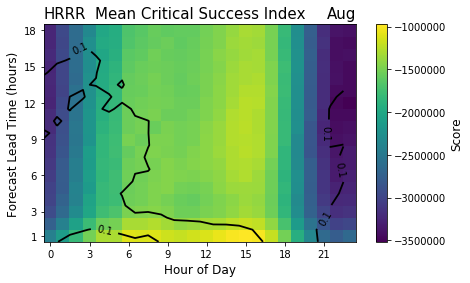

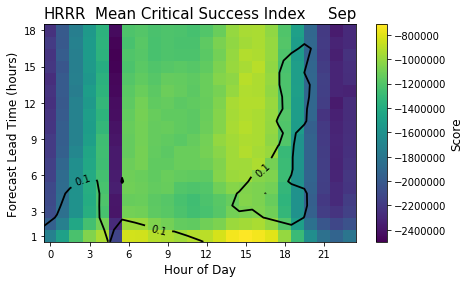

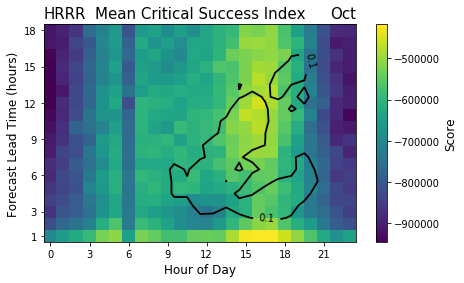

In [65]:
#for DOMAIN in domains:
for DOMAIN in ['HRRR']:
    for month in range(5,11):
        stats = get_HRRR_GLM_stats_hov_by_month(DOMAIN, month)
        #statsHRRR = get_HRRR_GLM_stats_hov_by_month('HRRR', month)

        fig, axes = plt.subplots(1, 1, figsize=(7*1, 4*1))

        plt.sca(axes)
        #plt.pcolormesh(range(25), range(1,20), stats[name]*100-statsHRRR[name]*100, cmap=cmap)
        plt.pcolormesh(range(25), range(1,20), stats['Hits']-(stats['Misses']+stats['False Alarms']))
        plt.colorbar(label='Score')
        CS = plt.contour(range(24), range(1,19), stats[name], colors='k', levels=np.arange(vmin-.1,vmax+1,.05))
        plt.clabel(CS, fmt='%1.1f')

        plt.yticks(np.array([1, 3, 6, 9, 12, 15, 18])+.5, [1, 3, 6, 9, 12, 15, 18])
        plt.xticks(np.arange(0,24,3)+.5, range(0,24,3), )

        plt.ylabel('Forecast Lead Time (hours)')
        plt.xlabel('Hour of Day')
        plt.title('Mean %s' % name)
        plt.title(DOMAIN, loc='left')
        plt.title(datetime(2018, month, 1).strftime('%b'), loc='right')